In [1]:
import os
import sys
import numpy as np
try:
    import cv2
except:
    import cv2
import tifffile as tiff
from multiprocessing import Pool
import time
import random
import math
import uuid 
import matplotlib.pyplot as plt
from datetime import datetime
import re
import csv
import json
import elasticdeform
from skimage import draw
from skimage.util import random_noise
from skimage.morphology import convex_hull_image
from scipy.stats import truncnorm
from skimage.draw import line
from skimage.draw import circle
from numba import jit
from skimage.morphology import thin

In [2]:
import glob

In [3]:
lis_files = glob.glob('../data_v9/whole_datasets/data/*.tif')


In [4]:
fname = lis_files[11]

vid = tiff.imread('../base_data/data/1102d8cb43b4_20200102205354.tif')

In [5]:
vid = tiff.imread(fname)

vid[:,0,:].shape

pool_out = []
for i in range(vid.shape[1]):
    pool_out.append(random_noise(vid[:,i,:], mean=0, var=0.01))
vidn = np.array(pool_out)

vidn = vidn.transpose((1, 0, 2))

pool_out = []
for i in range(vid.shape[2]):
    pool_out.append(random_noise(vidn[:,:,i], mean=0, var=0.01))
vidn = np.array(pool_out)

vidn.shape

vidn = vidn.transpose((1, 2, 0))

plt.figure(figsize=(15, 8))
plt.imshow(np.average(vidn, axis=0), cmap='gray')


sho

In [6]:
noisy = np.zeros((vid[0].shape), dtype='uint8')

In [7]:
noisy = random_noise(noisy, mean=0, var=0.00001)

In [8]:
noisy = noisy - noisy.min()
noisy = noisy / noisy.max()
noisy = noisy * 0.25
noisy = noisy * 255

In [9]:
noisy = noisy.astype('float32')

noisy = cv2.GaussianBlur(noisy, (3,3), 0)

In [10]:
vid = vid.astype('float32')

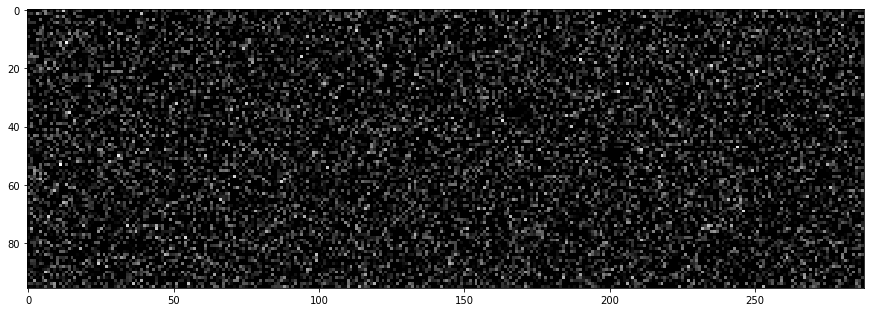

In [11]:
plt.figure(figsize=(15, 8))
plt.imshow(noisy, cmap='gray')

In [12]:
pool_out = []
for i in range(len(vid)):
    pool_out.append(cv2.add(vid[i], noisy))

In [13]:
vid = np.array(pool_out)

In [14]:
vid = vid - vid.min()
vid = vid / vid.max()
vid = vid * 255
vid = vid.astype('uint8')

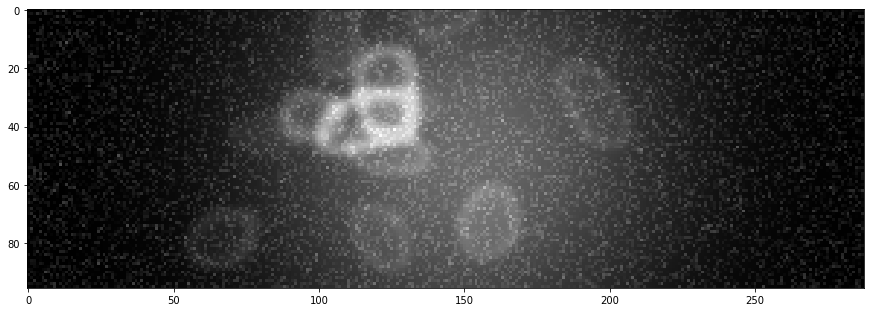

In [15]:
plt.figure(figsize=(15, 8))
plt.imshow(np.average(vid, axis=0), cmap='gray')


In [ ]:
noisy.max()

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(vid[1], cmap='gray')

In [ ]:
ns = []
for i in range(len(vid)):
    ns.append(noisy)

In [ ]:
ns = np.array(ns)

In [ ]:
plt.figure(figsize=(15, 8))
plt.imshow(np.average(ns, axis=0), cmap='gray')